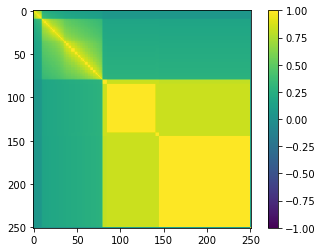

In [58]:
from sklearn.preprocessing import minmax_scale

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "../.."))
csv_filename = BASE_DIR + '\StreamingAssets\SimilarityMapCSV\hydrogen.raw_similarityMap.csv'
df = pd.read_csv(csv_filename, index_col = 0)
npArr = df.to_numpy()
npArr = np.rot90(npArr, -1)
fig, ax = plt.subplots(1, 1)
coll=ax.imshow(npArr, vmin=-1, vmax=1, cmap='viridis')
fig.colorbar(coll)

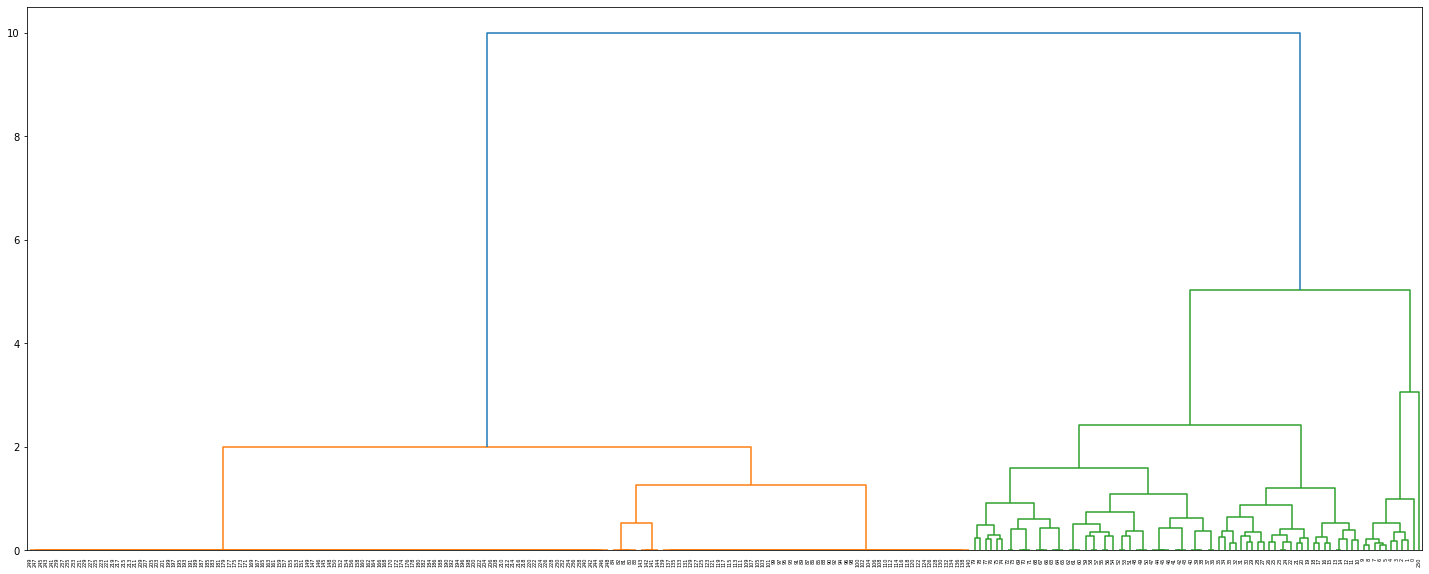

In [59]:
import scipy.cluster.hierarchy as shc
from collections import defaultdict, OrderedDict
fig, ax = plt.subplots(figsize=(25, 10))
dis = shc.linkage(npArr,metric='euclidean', method='average',  optimal_ordering = True ) # metric='cityblock', method='complete',
dend = shc.dendrogram(dis, ax = ax)
fig.canvas.draw()

In [60]:
k = 8
cluster = shc.fcluster(dis, k, criterion='maxclust')
ci = cluster
print(ci)
(unique, ix) = np.unique(ci, return_index=True )
frequencies_ix = np.asarray((unique, ix)).T
a1 = [ci[i] for i in sorted(np.unique(ci, return_index=True)[1])]
print(a1)
(unique, counts) = np.unique(ci, return_counts=True )
frequencies_Counts = np.asarray((unique, counts)).T
a2 = frequencies_Counts[:,1]
print(a2)

a3 = np.stack([a1,a2])
#plt.scatter(npArr[:,0], npArr[:,1], c = cluster)

[7 7 7 7 7 7 7 7 7 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8]
[7, 6, 5, 4, 2, 3, 1, 8]
[105   9  56  17  27  26  10   1]


[7 6 5 4 2 3 2 1 8]
[7, 6, 5, 4, 2, 3, 1, 8]
[105   9  56  17  27  26  10   1]


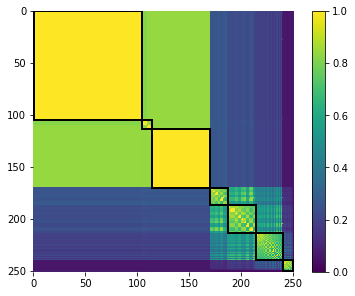

In [61]:

from netneurotools import plotting

d = plotting.plot_mod_heatmap(npArr, cluster , vmin=0, vmax=1, cmap='viridis') #communities=cluster, inds= cluster
ci = cluster

print(ci[np.concatenate(([True], np.diff(ci) != 0))])
# (unique, ix) = np.unique(ci, return_index=True )
# a1 = np.asarray((unique, ix)).T
a1 = [ci[i] for i in sorted(np.unique(ci, return_index=True)[1])]
print(a1)
(unique, counts) = np.unique(ci, return_counts=True )
frequencies_Counts = np.asarray((unique, counts)).T
a2 = frequencies_Counts[:,1]
print(a2)

a3 = np.stack([a1,a2])


#plt.scatter(npArr[:,0], npArr[:,1], c = cluster)


In [62]:
data_df = pd.DataFrame(a3).T
data_df

,0,1
0,7,105
1,6,9
2,5,56
3,4,17
4,2,27
5,3,26
6,1,10
7,8,1


In [63]:
final_df = data_df.sort_values(by=[0], ascending=True)
final_df[1]

6     10
4     27
5     26
3     17
2     56
1      9
0    105
7      1
Name: 1, dtype: int64

In [64]:
final_df.to_csv("hydrogen_isoRange.csv", header=False, index=False)

In [65]:
final_df[1].to_csv("hydrogen_isoRange.txt", sep='\t', header=False, index=False)